In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Basic Libraries 📚

import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [3]:
# Basic Modules & Useful Installations

import warnings
warnings.simplefilter(action='ignore')

In [4]:
# Geo Libraries 📚

import geopandas as gpd
from geopy.distance import geodesic
from geopy.distance import great_circle

In [5]:
# Machine Learning Libraries

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [6]:
# Find Nearby

def find_nearby_coworks(campsite, coworks, max_distance_km):
    nearby_coworks = []
    for _, cowork in coworks.iterrows():
        dist = great_circle((campsite.latitude, campsite.longitude), (cowork.latitude, cowork.longitude)).kilometers
        if dist <= max_distance_km:
            nearby_coworks.append(cowork)
    return nearby_coworks

In [7]:
# Construct reading relative path

relative_path = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/coworkings_chars.csv"
relative_path2 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/campsites_chars.csv"

# Change directory
os.chdir('C:\\Users\\Oscar\\Documents\\00_Ironhack\\P3_Final\\') #Change for your own directory

# Check directory
current_directory = os.getcwd()
print("Current working directory is:", current_directory)

Current working directory is: C:\Users\Oscar\Documents\00_Ironhack\P3_Final


In [8]:
# Construct absolute paths

coworkings_path = os.path.join(current_directory, relative_path)
campsites_path = os.path.join(current_directory, relative_path2)


In [9]:
# Coworkings reading

if os.path.exists(coworkings_path):
    try:
        # Try to read the CSV file
        data = pd.read_csv(coworkings_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", coworkings_path)

The file has been loaded successfully.


In [10]:
# Campsites reading

if os.path.exists(campsites_path):
    try:
        # Try to read the CSV file
        data2 = pd.read_csv(campsites_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", campsites_path)

The file has been loaded successfully.


In [11]:
# Dataframe Creation

dfco = data.copy()
dfca = data2.copy()


## PREPROCESSING for CLUSTERING

- DISTANCE PROBLEM

In the process of information handling through the API, some distances were miscalculated due to the formula for geodesic distances. We analyzed which small part of the dataset is affected and removed these outliers. Regardless of the unsupervised model we're going to use, these data points compromise the consistency of the project and would lead to odd results.

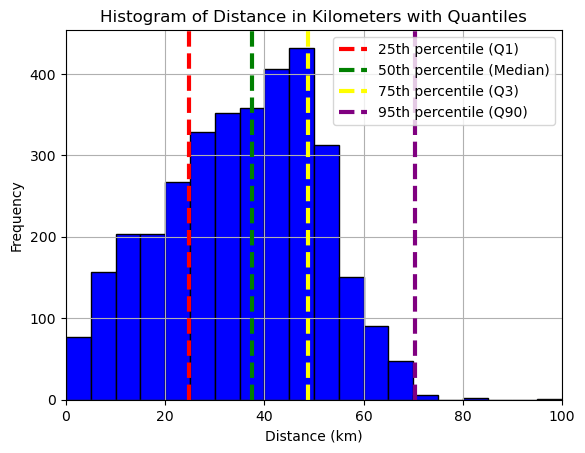

The maximal distance in km is 11603.14830674014 more over the 95th percentile is only 70.37163137640921



In [14]:

# Look for strange distances. Example:
strange_distance = dfca["distance_km"].max()

# Calculate quantiles
q25 = dfca["distance_km"].quantile(0.25)
q50 = dfca["distance_km"].quantile(0.50)  # This is the median
q75 = dfca["distance_km"].quantile(0.75)
q95 = dfca["distance_km"].quantile(0.95)  # Calculating 95th percentile

# Create the histogram
plt.hist(dfca["distance_km"], bins=20, color='blue', edgecolor='black', range=(0, 100))  # Limiting data to 0-100 km

# Add vertical lines for each quantile
plt.axvline(q25, color='red', linestyle='dashed', linewidth=3, label='25th percentile (Q1)')
plt.axvline(q50, color='green', linestyle='dashed', linewidth=3, label='50th percentile (Median)')
plt.axvline(q75, color='yellow', linestyle='dashed', linewidth=3, label='75th percentile (Q3)')
plt.axvline(q95, color='purple', linestyle='dashed', linewidth=3, label='95th percentile (Q90)')  # Marking the 95th percentile

# Labels & Title
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance in Kilometers with Quantiles')
plt.grid(True)

# Adjust the x-axis to show up to 100 km
plt.xlim(0, 100)

# Add a legend to make it clear what the lines represent
plt.legend()

plt.show()

print(f'The maximal distance in km is {strange_distance} more over the 95th percentile is only {q95}\n')

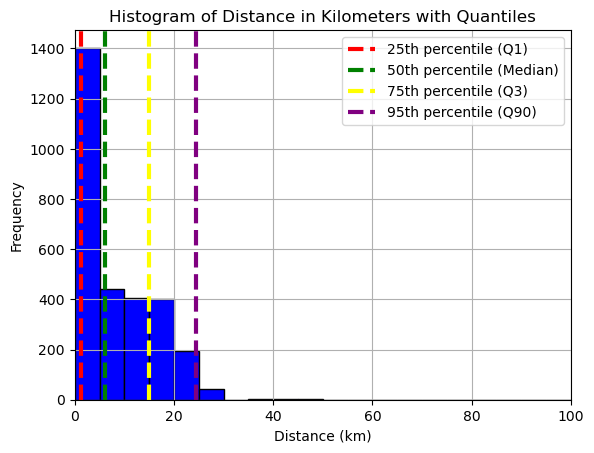

The maximal distance in km is 18020.4754461238 more over the 95th percentile is only 24.47326448729774



In [15]:

# Look for strange distances. Example:
strange_distance = dfco["distance_km"].max()

# Calculate quantiles
q25 = dfco["distance_km"].quantile(0.25)
q50 = dfco["distance_km"].quantile(0.50)  # This is the median
q75 = dfco["distance_km"].quantile(0.75)
q95 = dfco["distance_km"].quantile(0.95)  # Calculating 95th percentile

# Create the histogram
plt.hist(dfco["distance_km"], bins=20, color='blue', edgecolor='black', range=(0, 100))  # Limiting data to 0-100 km

# Add vertical lines for each quantile
plt.axvline(q25, color='red', linestyle='dashed', linewidth=3, label='25th percentile (Q1)')
plt.axvline(q50, color='green', linestyle='dashed', linewidth=3, label='50th percentile (Median)')
plt.axvline(q75, color='yellow', linestyle='dashed', linewidth=3, label='75th percentile (Q3)')
plt.axvline(q95, color='purple', linestyle='dashed', linewidth=3, label='95th percentile (Q90)')  # Marking the 95th percentile

# Labels & Title
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance in Kilometers with Quantiles')
plt.grid(True)

# Adjust the x-axis to show up to 100 km
plt.xlim(0, 100)

# Add a legend to make it clear what the lines represent
plt.legend()

plt.show()

print(f'The maximal distance in km is {strange_distance} more over the 95th percentile is only {q95}\n')

In [29]:
# Filtering

dfca = dfca[dfca['distance_km'] <= 60]
dfco = dfco[dfco['distance_km'] <= 25]

In [31]:
# Encoding categoricals. We are going to use manual encoding because we need it for the model after.

type = {
    'City': 0,
    'Town': 1,
    'Village': 2,
}


luxury = {
    'Campsite': 0,
    'Glamping': 1,
    'Camper': 2
}

# Other Features = Beach 1, No beach 0
# Wild 1 (If campsite >60km City, town > 25km, and village >15km)
# Now let's do the mapping

dfca['type'] = dfca['type'].map(type)
dfca['luxury'] = dfca['luxury'].map(luxury)


In [35]:
encoding_column = ["type", "luxury", "beach", "wild", "rating","distance_km","longitude", "latitude","city"] 

df_campsites = dfca[encoding_column]

In [37]:
encoding_column = ["city","rating","distance_km", "longitude", "latitude",] 

df_coworks = dfco[encoding_column]

## DBSCAN MODEL

In [45]:
# Fix the targeting


Xca = df_campsites.drop("city", axis = 1)


### TEST EUCLIDEAN METRIC

Euclidean Distance : It is the most commonly used metric in DBSCAN. It calculates the straight-line distance between two points in Euclidean space.

In [47]:
# Sample parameter grid to explore TEST 1

eps_values = [10,11,12,13,14,15,16,18,19,20,25,30,35,40,41,42,43,44,45,46,47,48,49,50]  
min_samples_values = [5,6,7,8,9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 


for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit DBSCAN with the current parameter set
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        dbscan.fit(Xca)
        
        # Compute the silhouette score if more than one cluster excluding noise
        if len(np.unique(dbscan.labels_)) > 1:
            score = silhouette_score(Xca, dbscan.labels_)
            db_index = davies_bouldin_score(Xca, dbscan.labels_)
            num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            print( f'EPS: {eps}, Min_Samples: {min_samples}, Silhouette Score: {score}, Number of Clusters: {num_clusters}, Davies-Bouldin Index: {db_index}')
            


EPS: 10, Min_Samples: 5, Silhouette Score: 0.38725748848689806, Number of Clusters: 7, Davies-Bouldin Index: 0.774479571208359
EPS: 10, Min_Samples: 6, Silhouette Score: 0.3911827255055353, Number of Clusters: 7, Davies-Bouldin Index: 1.0443216957738195
EPS: 10, Min_Samples: 7, Silhouette Score: 0.3911827255055353, Number of Clusters: 7, Davies-Bouldin Index: 1.0443216957738195
EPS: 10, Min_Samples: 8, Silhouette Score: 0.38881202627863204, Number of Clusters: 6, Davies-Bouldin Index: 1.1628223525747867
EPS: 10, Min_Samples: 9, Silhouette Score: 0.4824938498075864, Number of Clusters: 5, Davies-Bouldin Index: 1.627870891456294
EPS: 10, Min_Samples: 10, Silhouette Score: 0.481018304999272, Number of Clusters: 5, Davies-Bouldin Index: 1.5694046475322514
EPS: 10, Min_Samples: 11, Silhouette Score: 0.6559527185455283, Number of Clusters: 3, Davies-Bouldin Index: 1.405918414934452
EPS: 10, Min_Samples: 12, Silhouette Score: 0.6636513764745215, Number of Clusters: 2, Davies-Bouldin Index: 1.

Optimal results as our understanding:

- High value of Siluette (% of sample into clusters)
- Maximize number of clusters
- Minimal posible value of Davies-Bouldin Index (Means more distance between clusters and less distance between points into the cluster)

*Options:

- EPS: 30, Min_Samples: 5, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 30, Min_Samples: 6, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 30, Min_Samples: 7, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 30, Min_Samples: 8, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 30, Min_Samples: 9, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 30, Min_Samples: 10, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244



Good results, try focus with the same Min_samples EPS, and increase the minimal sample.



In [76]:
# Sample parameter grid to explore TEST 2

eps_values = [30,31,32,33,34,35,36,37,38,39,40]  # Example values (After first tests, we see interesant add values between 50 & 70)
min_samples_values = [11, 12, 13,14,15,16,17,18,19,20]


for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit DBSCAN with the current parameter set
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        dbscan.fit(Xca)
        
        # Compute the silhouette score if more than one cluster excluding noise
        if len(np.unique(dbscan.labels_)) > 1:
            score = silhouette_score(Xca, dbscan.labels_)
            db_index = davies_bouldin_score(Xca, dbscan.labels_)
            num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            print( f'EPS: {eps}, Min_Samples: {min_samples}, Silhouette Score: {score}, Number of Clusters: {num_clusters}, Davies-Bouldin Index: {db_index}')
            


EPS: 30, Min_Samples: 11, Silhouette Score: 0.7228169496700079, Number of Clusters: 4, Davies-Bouldin Index: 0.3995672142395244
EPS: 30, Min_Samples: 12, Silhouette Score: 0.7228169496700079, Number of Clusters: 4, Davies-Bouldin Index: 0.3995672142395244
EPS: 30, Min_Samples: 13, Silhouette Score: 0.7285463380707825, Number of Clusters: 3, Davies-Bouldin Index: 0.5418847843903917
EPS: 30, Min_Samples: 14, Silhouette Score: 0.7285463380707825, Number of Clusters: 3, Davies-Bouldin Index: 0.5418847843903917
EPS: 30, Min_Samples: 15, Silhouette Score: 0.7285463380707825, Number of Clusters: 3, Davies-Bouldin Index: 0.5418847843903917
EPS: 30, Min_Samples: 16, Silhouette Score: 0.7311489326904447, Number of Clusters: 2, Davies-Bouldin Index: 0.7100200410596655
EPS: 30, Min_Samples: 17, Silhouette Score: 0.7311489326904447, Number of Clusters: 2, Davies-Bouldin Index: 0.7100200410596655
EPS: 30, Min_Samples: 18, Silhouette Score: 0.7642361074797346, Number of Clusters: 1, Davies-Bouldin In

### TEST MANHATAN METRIC

Manhattan Distance (manhattan): Also known as city block distance or taxicab distance, it calculates the distance between two points by summing the absolute differences of their Cartesian coordinates.

In [52]:
# Sample parameter grid to explore  TEST 1

eps_values = [25,30,35,40,41,42,43,44,45,46,47,48,49,50] 
min_samples_values = [5,6,7,8,9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 


for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit DBSCAN with the current parameter set
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan')
        dbscan.fit(Xca)
        
        # Compute the silhouette score if more than one cluster excluding noise
        if len(np.unique(dbscan.labels_)) > 1:
            score = silhouette_score(Xca, dbscan.labels_)
            db_index = davies_bouldin_score(Xca, dbscan.labels_)
            num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            print( f'EPS: {eps}, Min_Samples: {min_samples}, Silhouette Score: {score}, Number of Clusters: {num_clusters}, Davies-Bouldin Index: {db_index}')
            


EPS: 25, Min_Samples: 5, Silhouette Score: 0.4151580337218273, Number of Clusters: 7, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 6, Silhouette Score: 0.4151580337218273, Number of Clusters: 7, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 7, Silhouette Score: 0.4151580337218273, Number of Clusters: 7, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 8, Silhouette Score: 0.4151580337218273, Number of Clusters: 7, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 9, Silhouette Score: 0.4151580337218273, Number of Clusters: 7, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 10, Silhouette Score: 0.4151580337218273, Number of Clusters: 7, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 11, Silhouette Score: 0.4151580337218273, Number of Clusters: 6, Davies-Bouldin Index: 0.5782908582326155
EPS: 25, Min_Samples: 12, Silhouette Score: 0.4151580337218273, Number of Clusters: 6, Davies-Bouldin Index: 

*Options:*

- EPS: 35, Min_Samples: 5, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 35, Min_Samples: 6, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 35, Min_Samples: 7, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 35, Min_Samples: 8, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 35, Min_Samples: 9, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 35, Min_Samples: 10, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244


 Following the next test focused between 30-40 and mantain the scale

In [71]:
# Sample parameter grid to explore  TEST 2

eps_values = [30,31,32,33,34,35,36,37,38,39,40]  # Example values (After first tests, we see interesant add values between 30-40)
min_samples_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] # Increase the min_sample in the good ratio of first tests


for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit DBSCAN with the current parameter set
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan')
        dbscan.fit(Xca)
        
        # Compute the silhouette score if more than one cluster excluding noise
        if len(np.unique(dbscan.labels_)) > 1:
            score = silhouette_score(Xca, dbscan.labels_)
            db_index = davies_bouldin_score(Xca, dbscan.labels_)
            num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            print( f'EPS: {eps}, Min_Samples: {min_samples}, Silhouette Score: {score}, Number of Clusters: {num_clusters}, Davies-Bouldin Index: {db_index}')
            


EPS: 30, Min_Samples: 5, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 6, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 7, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 8, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 9, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 10, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 11, Silhouette Score: 0.4839347961212121, Number of Clusters: 5, Davies-Bouldin Index: 0.5386249949428643
EPS: 30, Min_Samples: 12, Silhouette Score: 0.4839347961212121, Number of Clusters: 5, Davies-Bouldin Index: 

### TEST CHERISEV METRIC

Chebyshev Distance (chebyshev): It calculates the maximum absolute difference between the coordinates of the two points. It is useful when you want to measure the distance between two points in a chessboard-like grid.

In [58]:
# Sample parameter grid to explore

eps_values = [20,21,22,23,24,25,30,35,40,45,50,55,60,65,70]  # Example values (After first tests, we see interesant add values between 20 and 25)
min_samples_values = [5,6,7,8,9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] # After first tests, we see interesant add values between 5-10)


for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit DBSCAN with the current parameter set
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='chebyshev')
        dbscan.fit(Xca)
        
        # Compute the silhouette score if more than one cluster excluding noise
        if len(np.unique(dbscan.labels_)) > 1:
            score = silhouette_score(Xca, dbscan.labels_)
            db_index = davies_bouldin_score(Xca, dbscan.labels_)
            num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            print( f'EPS: {eps}, Min_Samples: {min_samples}, Silhouette Score: {score}, Number of Clusters: {num_clusters}, Davies-Bouldin Index: {db_index}')
            


EPS: 20, Min_Samples: 5, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 20, Min_Samples: 6, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 20, Min_Samples: 7, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 20, Min_Samples: 8, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 20, Min_Samples: 9, Silhouette Score: 0.4839347961212121, Number of Clusters: 6, Davies-Bouldin Index: 0.5386249949428643
EPS: 20, Min_Samples: 10, Silhouette Score: 0.4238447374593855, Number of Clusters: 6, Davies-Bouldin Index: 0.5141763847674837
EPS: 20, Min_Samples: 11, Silhouette Score: 0.4800207532060748, Number of Clusters: 5, Davies-Bouldin Index: 0.7387160325059666
EPS: 20, Min_Samples: 12, Silhouette Score: 0.4800207532060748, Number of Clusters: 5, Davies-Bouldin Index: 

*OPTIONS

- EPS: 21, Min_Samples: 5, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 21, Min_Samples: 6, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 21, Min_Samples: 7, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 21, Min_Samples: 8, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 21, Min_Samples: 9, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

- EPS: 21, Min_Samples: 10, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

There is no reasons in the table for improve the results of the last 2 tests.


## FINAL CHOICE


Thinking in future feeding, less number de EPS es better for avoid grow the Davies-Bouldin Index.  5 clusters give several options and we mantain a small minimal sample of only 10 for do a cluster, because the data is not balanced.

- EUCLIDEAN

EPS: 30, Min_Samples: 10, Silhouette Score: 0.7228169496700079, Number of Clusters: 5, Davies-Bouldin Index: 0.3995672142395244

In [83]:
# Initialize and fit DBSCAN for campsites
dbscan_campsites = DBSCAN(eps=30, min_samples=10, metric='euclidean').fit(Xca)

# Assign cluster labels to df_campsites for mantin the column city.
df_campsites['cluster'] = dbscan_campsites.labels_



## ADJUSTMENTS FOR STREAMLIT 

In [89]:
# Initialize and fit DBSCAN for campsites with results EPS: 30, Min_Samples: 10

dbscan_optimal_campsites = DBSCAN(eps=30, min_samples=10, metric='euclidean').fit(Xca)

# Assign cluster labels
df_campsites['cluster'] = dbscan_optimal_campsites.labels_


In [91]:
for cluster_id in np.unique(dbscan_optimal_campsites.labels_):
    if cluster_id == -1:
        continue  # Exclude noise
    cluster_members = df_campsites[df_campsites['cluster'] == cluster_id]
    print(f"Cluster ID: {cluster_id}")
    
    # Example: Find the average distance and ratings, and count characteristics
    avg_distance = cluster_members['distance_km'].mean()
    avg_rating = cluster_members['rating'].mean()
    wild_count = cluster_members['wild'].sum()
    beach_count = cluster_members['beach'].sum()
    type_count = cluster_members['type'].sum()
    luxury_count = cluster_members['luxury'].sum()
    
    print(f"Average Distance: {avg_distance}, Average Rating: {avg_rating}")
    print(f"Wild: {wild_count}, Beach: {beach_count}")
    print(f"City Type: {type}, Beach: {luxury}")
    
    # Further analysis based on 'type' or other factors here
    print(cluster_members, "\n")

Cluster ID: 0
Average Distance: 34.00861806917442, Average Rating: 4.120194113963681
Wild: 1916, Beach: 995
City Type: {'City': 0, 'Town': 1, 'Village': 2}, Beach: {'Campsite': 0, 'Glamping': 1, 'Camper': 2}
      type  luxury  beach  wild  rating  distance_km  longitude   latitude  \
0        0       0      0     0     3.9     9.458117  -3.603361  40.453734   
1        1       0      0     0     3.9    20.181317  -3.603361  40.453734   
2        1       0      0     0     3.9    24.875383  -3.603361  40.453734   
3        1       0      0     0     3.9    10.851165  -3.603361  40.453734   
4        1       0      0     0     3.9    28.066198  -3.603361  40.453734   
...    ...     ...    ...   ...     ...          ...        ...        ...   
3564     2       0      0     1     4.4    22.713277  -0.206368  43.129771   
3565     2       0      0     1     4.5    47.411886  -0.915795  43.142601   
3566     2       0      0     1     4.5    32.475489  -0.068011  43.104360   
3567     2  

In [ ]:
# Find Nearby

def find_nearby_coworks(campsite, coworks, max_distance_km):
    nearby_coworks = []
    for _, cowork in coworks.iterrows():
        dist = great_circle((campsite.latitude, campsite.longitude), (cowork.latitude, cowork.longitude)).kilometers
        if dist <= max_distance_km:
            nearby_coworks.append(cowork)
    return nearby_coworks

In [132]:
# Example usage for the first campsite
campsite = df_campsites.iloc[100]
coworks = dfco
nearby_coworks = find_nearby_coworks(campsite, coworks, 22)  # finding coworks within 15 km

In [138]:
nearby_coworks

[name                                            TaiLab Coworking
 address              C. Chile 10 oficina 125 Las Rozas de Madrid
 city                                            Collado Villalba
 website                                        http://tailab.es/
 schedule       Monday: 8:00 AM – 9:00 PM Tuesday: 8:00 AM – 9...
 longitude                                              -3.900136
 latitude                                               40.543729
 distance_km                                            13.164655
 rating                                                       4.5
 long_buf                                                -4.00556
 lat_buf                                                40.630877
 Name: 1304, dtype: object,
 name                                         Coworking Las Rozas
 address                         C. de Teruel Las Rozas de Madrid
 city                                            Collado Villalba
 website               https://coworking-las-roz

In [140]:
# Max and Min distance that you need for find a coworking:

distances = [entry['distance_km'] for entry in nearby_coworks]

# Encontrar el máximo
max_distance = max(distances)
# Encontrar el mínimo
min_distance = min(distances)

In [142]:
max_distance

19.246935330848785

In [144]:
min_distance

0.4418602727605568

In [ ]:
# Assuming you add results to your dataframe or a separate list

df_campsites['nearby_coworks_count'] = df_campsites.apply(lambda x: len(find_nearby_coworks(x, df_coworks, 25)), axis=1)

# Recommend campsites with at least one coworking space nearby

recommended_campsites = df_campsites[df_campsites['nearby_coworks_count'] > 0]

import folium

#Create a map centered at an average location
map_center = [df_campsites['latitude'].mean(), df_campsites['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

#Define colors for different clusters
cluster_colors = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'orange',
    4: 'purple'
    # Add more colors as needed
}

#Add points to the map
for _, row in df_campsites.iterrows():
    if row['cluster'] != -1:  # Excluding noise points
        cluster_color = cluster_colors.get(row['cluster'], 'gray')  # Default to gray if cluster color not defined
        folium.Marker(location=[row['latitude'], row['longitude']],
                      popup=f'Cluster: {row["cluster"]}',
                      icon=folium.Icon(color=cluster_color)).add_to(m)

#To display the map in a Jupyter Notebook
m


In [ ]:
# Construct reading relative path
relative_path8 = "my-jobcation-path/coworkings_encoding.csv"
relative_path9 = "my-jobcation-path/campsites_encoding.csv"

# Construct absolute paths
coworkings_save_path = os.path.join(current_directory, relative_path8)
campsites_save_path = os.path.join(current_directory, relative_path9)

In [ ]:
# Save and Encoding 

df_coworks.to_csv(coworkings_save_path, index=False, encoding='utf-8')
df_campsites.to_csv(campsites_save_path, index=False, encoding='utf-8')